In [ ]:
# Last amended: 06th Dec, 2020
# My folder: C:\Users\Administrator\OneDrive\Documents\cat_in_the_dat
# Kaggle Data Source: https://www.kaggle.com/c/cat-in-the-dat
# Ref: https://www.kaggle.com/shahules/an-overview-of-encoding-techniques
# Objective:
#            Encoding of Categorical data
#

In [1]:
# 1.0 Call libraries
%reset -f
import pandas as pd
import numpy as np

# 1.1 Encoding techniques
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html
#      https://stackoverflow.com/a/54266681/3282777
from sklearn.feature_extraction import FeatureHasher
import scipy

# 1.2 Data processing and performance measure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

# 1.3 Miscellaneous
import matplotlib.pyplot as plt
import os

In [2]:
# 2.0 Display outputs of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 2.1 Change folder
os.chdir("C:\\Users\\Administrator\\OneDrive\\Documents\\cat_in_the_dat")

In [4]:
# 2.2 Read data
df_train=pd.read_csv('train.csv.zip')
df_test=pd.read_csv('test.csv.zip')

In [5]:
# 2.2.1
df_train.shape     # (300000, 25)
df_test.shape      # (200000, 24)

(300000, 25)

(200000, 24)

In [6]:
# 2.2.2
df_train.head()
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [7]:
# 2.2.3 Drop id column
df_train.drop(columns = ['id'], inplace = True)

In [8]:
# 2.2.4
df_train.info()   # memory usage: 54.9+ MB
df_test.info()    # memory usage: 36.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 

In [9]:
# 2.2.5 Distribution of data types
df_train.dtypes.value_counts(normalize = True)

object    0.708333
int64     0.291667
dtype: float64

In [10]:
# 2.2.6 Number of levels in each column
vc = []
for i in df_train.columns:
    s = df_train[i].value_counts().shape[0]
    vc.append(s)
    
pd.DataFrame(vc, index = df_train.columns, columns = ['levels'])     

,levels
bin_0,2
bin_1,2
bin_2,2
bin_3,2
bin_4,2
nom_0,3
nom_1,6
nom_2,6
nom_3,6
nom_4,4


### Defining the train and target

In [11]:
# 3.0 Separate predictor/target
X=df_train.drop(['target'],axis=1).copy()
y=df_train['target'].copy() 

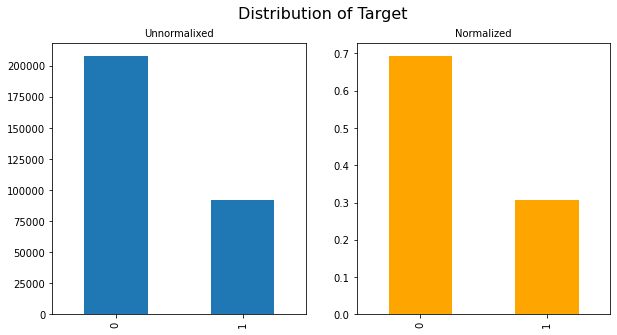

In [12]:
# 3.1 Plot target distribution
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
_= y.value_counts().plot.bar(ax = ax1)
ax2 = fig.add_subplot(1,2,2)
_= y.value_counts(normalize = True).plot.bar(ax = ax2, color = "orange")
_=ax1.set_title("Unnormalixed", fontsize= 10)
_=ax2.set_title("Normalized", fontsize = 10)
_= fig.suptitle("Distribution of Target", fontsize = 16)

In [13]:
# 4.0 'object' columns
obj_cols = list(X.select_dtypes(include = 'object').columns)
obj_cols
len(obj_cols)   # 17

['bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5']

17

## Method 1: Label encoding <a id='1'></a>
In this method we change every categorical data to a number.That is each type will be subtuted by a number.for example we will substitute 1 for Grandmaster,2 for master ,3 for expert etc..
For implementing this we will first import *Labelencoder* from  *sklearn* module.

In [14]:
# 5.0 Label encode categorical features

le = []
for i, c in enumerate(obj_cols):
    l_enc = LabelEncoder()
    X[c] = l_enc.fit_transform(X[c])
    le.append(l_enc)

In [15]:
# 5.1
X.head() 
X.shape

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,1,1,1,5,5,3,0,...,1686,2175,2,2,1,7,3,136,2,2
1,0,1,0,1,1,1,4,3,5,2,...,650,11635,1,2,3,0,0,93,7,8
2,0,0,0,0,1,0,4,4,5,3,...,1932,8078,1,1,4,7,17,31,7,2
3,0,1,0,0,1,2,4,5,0,1,...,629,6056,1,2,0,8,3,134,2,1
4,0,0,0,0,0,2,4,4,0,1,...,1760,8231,1,2,2,0,17,158,7,8


(300000, 23)

### Logistic regression

In [16]:
# 6.0
def logistic(X,y):
    # 6.1 Split
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
    # 6.2 Get the model
    lr=LogisticRegression()   # Default parameters
    lr.fit(X_train,y_train) 
    # 6.3 Predict and performance
    y_pre=lr.predict(X_test)
    print('Accuracy : ',accuracy_score(y_test,y_pre))


In [17]:
# 6.4 Model now
logistic(X,y)

Accuracy :  0.6945466666666666


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Method 2: One Hot Encoding

This produces output as a pandas dataframe.Alternatively we can use *OneHotEncoder()* method available in* sklearn* to convert our data to on-hot encoded data. This method produces a sparse metrix. The advantage of asparse matrix is that it uses very less disk-space as also cpu resourses.

In [18]:
# 7.0 Get data afreshFresh
X=df_train.drop(['target'],axis=1).copy()
y=df_train['target'].copy() 

In [19]:
# 7.1 Transform all columns to 'str' type
for i in X.columns:
    X[i] = X[i].astype('str')

In [20]:
# 7.2 
X.shape
oe = OneHotEncoder()
oe.fit(X)  

(300000, 23)

OneHotEncoder()

In [21]:
# 7.3

train=oe.transform(X)
type(train)     # scipy.sparse.csr.csr_matrix
                # See Wikipedia: https://en.wikipedia.org/wiki/Sparse_matrix
                # for details about Sparse matrix storage format

scipy.sparse.csr.csr_matrix

In [22]:
# 7.3.1
train.shape         # (300000, 16461)
# 7.4
logistic(train,y)   # 0.7600666666666667

(300000, 16461)

Accuracy :  0.7600666666666667


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 3 : Feature hashing (a.k.a the [hashing trick](https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f))  <a id='3'></a>

### When to use Feature hashing
It is a high-speed, on-the-fly, low-memory vectorizer. At times one can't use one hot encoding because one is taking data in chunks and it may happen that a new chunk contains some categorical values in a feature/features that were not present in the feature/features of first chunk. In that case onehot encoding wil make more columns as compared to first chunk. As one needs to apply data to partial_fit classifier one need same number of columns in each iteration. Feature HAshing is the solution. Please see this [reference](https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f)<br>
FeatureHasher does not remember what the input-data looked like and does not have an inverse-transform method.


#### Pseudo-code [from Wikipedia](https://en.wikipedia.org/wiki/Feature_hashing)

`function hashing_vectorizer(features : array of string, N : integer):<br>
     x := new vector[N]<br>
     for f in features:<br>
         h := hash(f)<br>
         x[h mod N] += 1<br>
     return x<br>`
 
See [here](http://203.122.28.230/moodle/mod/resource/view.php?id=552) om Moodle for detailed workout. A IInd hash function (`ξ()`) is used to avoid possibilities of collisons, as follows:

`
function hashing_vectorizer(features : array of string, N : integer):
     x := new vector[N]
     for f in features:
         h := hash(f)
         idx := h mod N
         if ξ(f) == 1:
             x[idx] += 1
         else:
             x[idx] -= 1
     return x
`

In [23]:
# 8.0 Here is a small demo
demo = pd.Series(['a','a','b','b','c','c'])

# 8.1 Instantiate FeatureHasher
fe = FeatureHasher(
                   n_features = 5,           # How many features
                   input_type='string',
                   alternate_sign = False,   # default: True
                   dtype = np.float32        # default: np.float64 (https://numpy.org/devdocs/user/basics.types.html)
                   )

# 8.2 Fit and transform
out = fe.fit_transform(demo)
type(out)

scipy.sparse.csr.csr_matrix

In [24]:
# 8.3
out.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [25]:
# 8.4 Apply it to a new set
demo1 = pd.Series(['a','b','d','c'])
fe.fit_transform(demo1).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

### Method 3A: Feature Hashing--Approach I
Hash each feature separately and concatenate the results. (See this [reply](https://stackoverflow.com/a/65154502/3282777) on StackOverflow)

In [26]:
# 9.0 Get data afresh
X=df_train.drop(['target'],axis=1).copy()
y=df_train['target'].copy() 

In [27]:
# 9.1 Feature Hashing on multiple categorical features(columns)
#     https://stackoverflow.com/a/54266681/3282777

hash = []
n_features = 20   # Treat is as an hyperparameter
for i,c in enumerate(obj_cols):
    X[c] = X[c].astype('str') 
    hs = FeatureHasher(n_features = n_features,input_type='string')
    hash.append(hs.fit_transform(X[c]))

In [28]:
# 9.2 Check
hash   # 20 * 16 = 320 columns

[<300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 300000 stored elements in Compressed Sparse Row format>,
 <300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 300000 stored elements in Compressed Sparse Row format>,
 <300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 950848 stored elements in Compressed Sparse Row format>,
 <300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 1700727 stored elements in Compressed Sparse Row format>,
 <300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 1087068 stored elements in Compressed Sparse Row format>,
 <300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 1512923 stored elements in Compressed Sparse Row format>,
 <300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 1323190 stored elements in Compressed Sparse Row format>,
 <300000x20 sparse matrix of type '<class 'numpy.float64'>'
 	with 1824253 stored elements in Compressed Sparse Row format>,
 <3

In [29]:
# 9.3 Drop columns converted to hash-features

X.shape   # (300000, 23)
X.drop(columns = obj_cols, inplace = True)
X.shape   # (300000, 6)

(300000, 23)

(300000, 6)

In [30]:
# 9.4 Concatenate with X, newly created hash-features
h = scipy.sparse.csr_matrix(X.values)
# 9.5
for i in range(len(obj_cols)):
    h = scipy.sparse.hstack([h, hash[i]])

In [31]:
# 9.6 Check
h.shape    # (300000, 347)
h
# 9.7 Approx size in bytes
#     Sparse data
h.data.nbytes

(300000, 346)

<300000x346 sparse matrix of type '<class 'numpy.float64'>'
	with 21810837 stored elements in COOrdinate format>

174486696

In [ ]:
# 9.8 Dense data
h.toarray().data.nbytes

In [32]:
# 9.9 Model now
logistic(h,y)

Accuracy :  0.72808


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Method 3B: Feature Hashing: Approach II
Hash all features at one go. (See this [reply](https://stackoverflow.com/a/65154502/3282777) on StackOverflow). This approach gives better results.

In [33]:
# 10.0 Get data afresh
X=df_train.drop(['target'],axis=1).copy()
y=df_train['target'].copy() 

In [34]:
# 10.1 Transform all column dtypes to 'object'
for c in X.columns:
    X[c]=X[c].astype('str')  

In [35]:
# 10.2 Check
X.shape
X.dtypes
X.head()

(300000, 23)

bin_0    object
bin_1    object
bin_2    object
bin_3    object
bin_4    object
nom_0    object
nom_1    object
nom_2    object
nom_3    object
nom_4    object
nom_5    object
nom_6    object
nom_7    object
nom_8    object
nom_9    object
ord_0    object
ord_1    object
ord_2    object
ord_3    object
ord_4    object
ord_5    object
day      object
month    object
dtype: object

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


In [36]:
# 10.3 Instantiate FeatureHasher
#      and transform to hashed dataset
hashing=FeatureHasher(input_type='string')
train=hashing.transform(X.values)

In [37]:
# 10.4 Check
type(train)    # scipy.sparse.csr.csr_matrix
train.shape    # (300000, 1048576)

scipy.sparse.csr.csr_matrix

(300000, 1048576)

In [38]:
# 10.5 Model now
logistic(train,y)   # 0.75224

Accuracy :  0.75224


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 4 :Encoding categories with dataset statistics  <a id='4'></a>

 Now we will try to give our models a numeric representation for every category with a small number of columns but with an encoding that will put similar categories close to each other. The easiest way to do it is replace every category with the number of times that we saw it in the dataset. This way if New York and New Jersey are both big cities, they will probably both appear many times in our dataset and the model will know that they are similar.

In [39]:
# 11.0 Get data afresh
X=df_train.drop(['target'],axis=1).copy()
y=df_train['target'].copy() 

In [40]:
X.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


In [41]:
# 11.1 Replace cat_columns with 'counts'
for c in obj_cols:
    counts=X[c].value_counts()
    # 11.1.1 Add some noise to values
    counts += np.random.rand(len(counts))/1000
    X[c] = X[c].map(counts)
    

In [42]:
X.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,153535.000670,191633.000814,127341.000483,29855.000867,45979.000765,36942.000595,68448.000254,...,271.000504,19.000118,2,77428.000974,33768.000707,24740.000307,3974.000130,506.000623,2,2
1,0,1,0,153535.000670,191633.000814,127341.000483,101181.000631,29487.000017,101123.000155,84517.000044,...,111.000238,13.000751,1,77428.000974,22227.000601,35276.000899,18258.000908,2603.000977,7,8
2,0,0,0,146465.000951,191633.000814,96166.000639,101181.000631,101295.000342,101123.000155,54742.000149,...,278.000616,29.000636,1,25065.000587,63908.000196,24740.000307,16927.000097,2572.000106,7,2
3,0,1,0,146465.000951,191633.000814,76493.000149,101181.000631,45979.000765,49951.000091,92293.000313,...,203.000209,44.000514,1,77428.000974,60627.000914,28048.000223,3974.000130,2590.000282,2,1
4,0,0,0,146465.000951,108367.000148,76493.000149,101181.000631,101295.000342,49951.000091,92293.000313,...,207.000016,35.000945,1,77428.000974,99816.000741,35276.000899,16927.000097,2854.000980,7,8


In [43]:
# 11.2
logistic(X,y)

Accuracy :  0.6932


## Method 5: Encoding cyclic features  <a id='6'></a>
![](https://miro.medium.com/max/343/1*70cevmU8wNggGJEdLam1lw.png)

Some of our features are cyclic in nature.ie day,month etc.

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.



In [44]:
# 12.0 Take sine and cos of data
# Days of week
s = pd.Series([2,7,3,1,2,4,1])
# 12.1
np.sin(2*np.pi*s)
# 12.2 Normalize
np.sin(2*np.pi*s)/max(s)

# 12.3  Months
t = pd.Series([12,11,3,10,2,4,1])
np.sin(2* np.pi * t)
np.sin(2 * np.pi * t)/max(t)


0   -4.898587e-16
1   -1.714506e-15
2   -7.347881e-16
3   -2.449294e-16
4   -4.898587e-16
5   -9.797174e-16
6   -2.449294e-16
dtype: float64

0   -6.997982e-17
1   -2.449294e-16
2   -1.049697e-16
3   -3.498991e-17
4   -6.997982e-17
5   -1.399596e-16
6   -3.498991e-17
dtype: float64

0   -2.939152e-15
1   -9.799650e-15
2   -7.347881e-16
3   -2.449294e-15
4   -4.898587e-16
5   -9.797174e-16
6   -2.449294e-16
dtype: float64

0   -2.449294e-16
1   -8.166375e-16
2   -6.123234e-17
3   -2.041078e-16
4   -4.082156e-17
5   -8.164312e-17
6   -2.041078e-17
dtype: float64

In [49]:
# 13.0 Get data afresh
X=df_train.drop(['target'],axis=1).copy()
y=df_train['target'].copy() 

In [50]:
%%time
# 13.1
columns=['day','month']
for col in columns:
    X[col+'_sin']= np.sin((2*np.pi*X[col])/max(X[col]))
    X[col+'_cos']= np.cos((2*np.pi*X[col])/max(X[col]))

# 13.2    
X=X.drop(columns,axis=1)

X[['day_sin','day_cos']].head(3)

Wall time: 179 ms


,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000


Now we will use OnHotEncoder to encode other variables,then feed the data to our model.

In [51]:
# 14.1
one=OneHotEncoder()
# 14.2
one.fit(X)
train=one.transform(X)
train.shape

OneHotEncoder()

(300000, 16478)

In [52]:
# 15.0 Perform modeling now
logistic(train,y)    # 0.7611866666666667

Accuracy :  0.7611866666666667


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 6 : Target encoding <a id='7'></a>
 		
Target-based encoding is numerization of categorical variables via target. In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.

for example,
<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0</td>
    </tr>
    <tr>
    <td>India</td>
    <td>0</td>
    </tr>
    <tr>
    <td>China</td>
    <td>1</td>
    </tr>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
</table>



Encoding for India = [Number of true targets under the label India/ Total Number of targets under the label India] 
which is 2/3 = 0.66

<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>0.66</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0.5</td>
    </tr>
</table>



In [53]:
# 16.0 Get data afresh
X=df_train.copy()
y=df_train['target'].copy() 

In [54]:
%%time
# 16.1 
X['day']=X['day'].astype('object')
X['month']=X['month'].astype('object')
# 16.2
for col in X.columns:
    if (X[col].dtype=='object'):
        target= dict ( X.groupby(col)['target'].agg('sum')/X.groupby(col)['target'].agg('count'))
        X[col]=X[col].replace(target).values   

X.head(4)

Wall time: 1min 49s


,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,0.237743,...,0.368421,2,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432,0
1,0,1,0,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,0.304164,...,0.076923,1,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496,0
2,0,0,0,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,0.353951,...,0.172414,1,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432,0
3,0,1,0,0.309384,0.290107,0.351052,0.290054,0.307162,0.339793,0.329472,...,0.227273,1,0.403885,0.360961,0.330148,0.208354,0.355985,0.322048,0.255729,1


In [55]:
# 17.0 Perform modeling
logistic(X.drop('target',axis=1),y)   #  0.7847733333333333

Accuracy :  0.7847733333333333


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Fold Target encoding <a id='8' ></a>

Ref explanation: [K-Fold Target Encoding](https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b)

k-fold target encoding can be applied to reduce the overfitting. In this method, we divide the dataset into the k-folds, here we consider 5 folds. Fig.3 shows the first round of the 5 fold cross-validation. We calculate mean-target for fold 2, 3, 4 and 5 and we use the calculated values, mean_A = 0.556 and mean_B = 0.285 to estimate mean encoding for the fold-1.

In [ ]:
# 16.0 Get data afresh

X=df_train.copy()
y=df_train['target'].copy() 
colnames = X.columns.values
targetName = 'target'

In [ ]:
# 17.0
# Ref: https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b
#      https://github.com/pourya-ir/Medium/blob/master/K-fold-target-enc/K-fold-Target-Encoding.ipynb

from sklearn.base import BaseEstimator, TransformerMixin
class KFoldTargetEncoderTrain(BaseEstimator,TransformerMixin):
    def __init__(self,colnames,targetName, n_fold=5, verbosity=True, discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        
        mean_of_target = X[self.targetName].mean()
        
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=2019)
        
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames) 
                                     [self.targetName].mean())
            
            X[col_mean_name].fillna(mean_of_target, inplace = True)
            
            if self.verbosity:
                encoded_feature = X[col_mean_name].values
                #print('Correlation between the new feature, {} and, {} 
                 #  is {}.'.format(col_mean_name,self.targetName,                    
                  # np.corrcoef(X[self.targetName].values,  
                   #            encoded_feature)[0][1]))
            
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            
        return X

In [ ]:
# 18.0
# NOT FULLY IMPLEMENTED
# ToDo

df = []
for i in obj_cols:
    kf = KFoldTargetEncoderTrain(colnames= i,targetName = 'target')
    df.append(kf.fit_transform(X))

In [ ]:
len(df)

In [ ]:
df[0].columns
df[1].columns

One can also try a mix of approaches to encode the dataset if that gives better results


In [ ]:
############################# I am done ##################